In [2]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

api.dataset_download_files('uciml/iris', path='datasets', unzip=True)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def euclidean_distance(p, q): # p and q are the data points
    return np.sqrt(np.sum((np.array(p) - np.array(q))**2))

class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
        self.point = None

    def fit(self, points): # training the model means literally just having the points existing, because the points IS the trained model.
        self.points = points

    def predict(self, new_point): # calculating the distance between the one new points to predict for between points
        distances = []

        for category, points in zip(self.points.keys(), self.points.values()):
            for point in points:
                distance = euclidean_distance(new_point, point)
                distances.append([distance, category])

        categories = [category[1] for category in sorted(distances,key=lambda x: x[0])[:self.k]] # use the first element of each sublist as the key to sort.”)
        most_common = Counter(categories).most_common(1)[0][0]
        return most_common

# reference: https://www.youtube.com/watch?v=xtaom__-drE&ab_channel=NeuralNine

# Using IRIS dataset

In [7]:
import pandas as pd
from pathlib import Path

data_path = Path('datasets/Iris.csv')

dataset_df = pd.read_csv(data_path).drop(columns=["Id"])
dataset_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## EDA

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing Values:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dataset Statistics:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000  

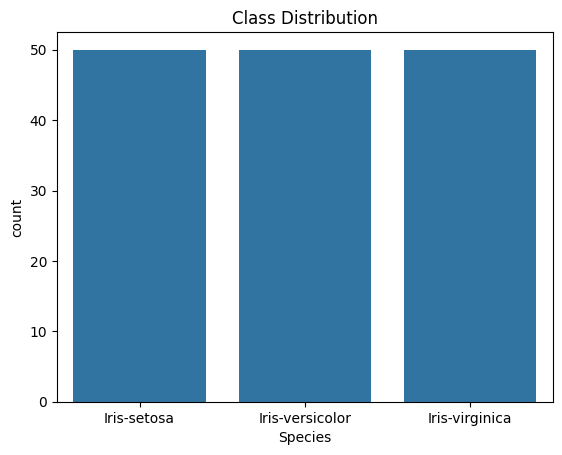

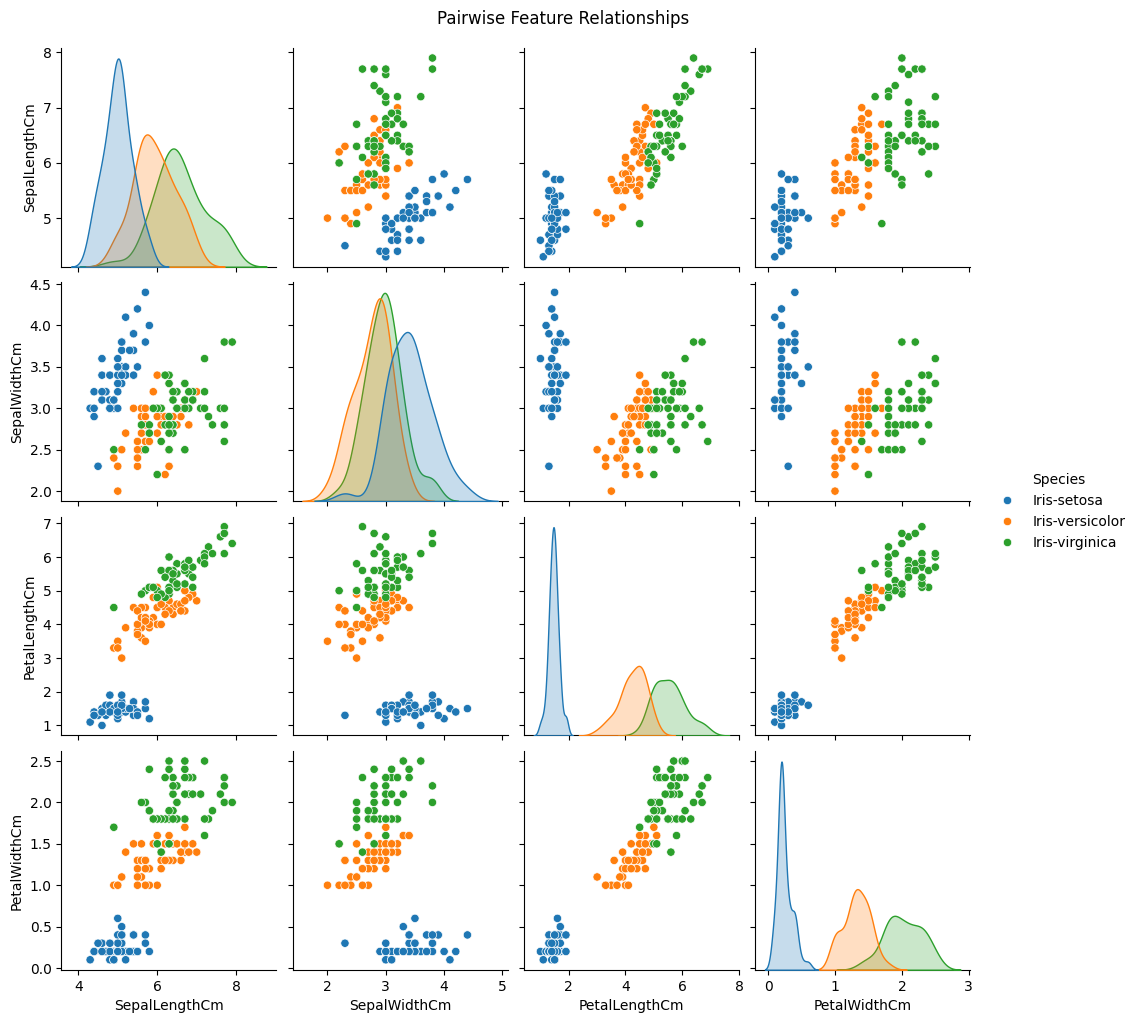

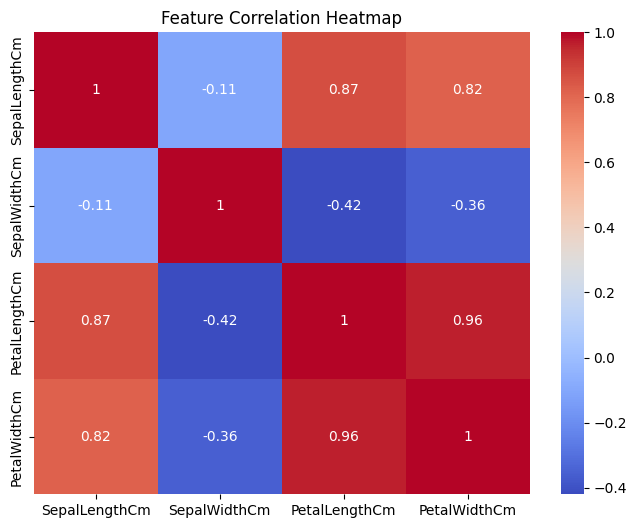

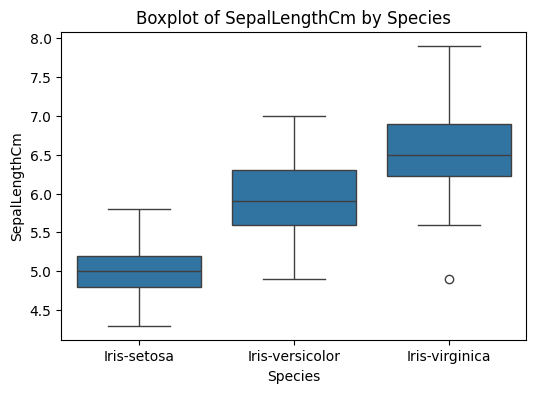

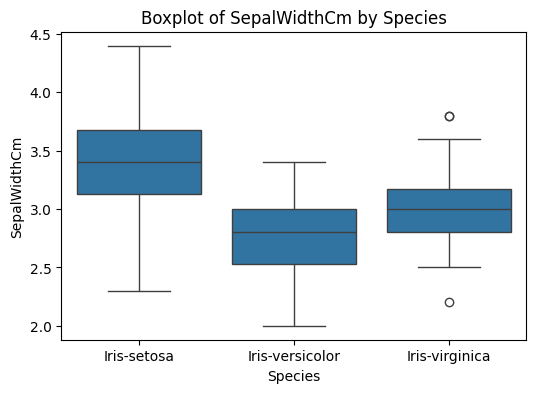

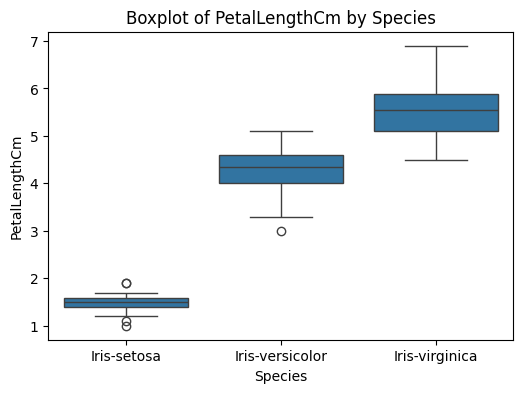

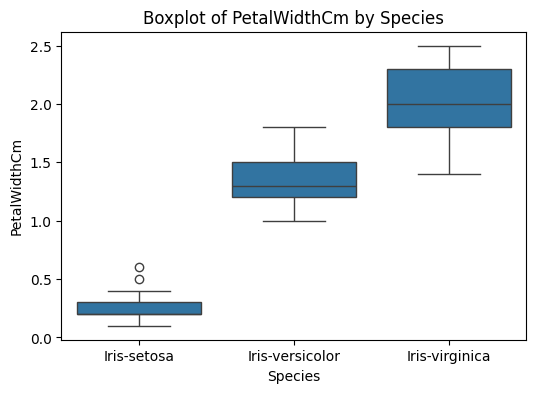

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Basic Info
print("Dataset Info:")
print(dataset_df.info())

# Check missing values
print("\nMissing Values:")
print(dataset_df.isnull().sum())

# Describe
print("\nDataset Statistics:")
print(dataset_df.describe())

# Class distribution
print("\nClass Distribution:")
print(dataset_df['Species'].value_counts())

# Plot: Class distribution
sns.countplot(x='Species', data=dataset_df)
plt.title("Class Distribution")
plt.show()

# Pairplot of features colored by species
sns.pairplot(dataset_df, hue='Species')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(dataset_df.drop(columns=['Species']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplots for each feature
features = dataset_df.columns[:-1]  # all columns except Species
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Species', y=feature, data=dataset_df)
    plt.title(f"Boxplot of {feature} by Species")
    plt.show()


In [9]:
from sklearn.model_selection import train_test_split

X = dataset_df.drop(columns=['Species'])
y = dataset_df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [10]:
train_df = pd.concat([X_train, y_train], axis=1)

# Group by species and convert to dict
train_grouped = train_df.groupby("Species")
train_species_dict = {species: datapoint.drop(columns=["Species"]).values.tolist()
                for species, datapoint in train_grouped}

In [11]:
X_test = X_test.values.tolist()

model = KNearestNeighbors(5)
model.fit(train_species_dict)
y_preds = [model.predict(test_datapoint) for test_datapoint in X_test]

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# 1. Accuracy
acc = accuracy_score(y_test, y_preds)
print(f"Accuracy: {acc:.3f}")

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_preds,
                      labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
print("Confusion Matrix:\n", cm)

# 3. Classification Report (precision, recall, f1)
print("\nClassification Report:\n",
      classification_report(y_test, y_preds,
                            target_names=['setosa','versicolor','virginica']))


Accuracy: 1.000
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
category_names = list(train_species_dict.keys())

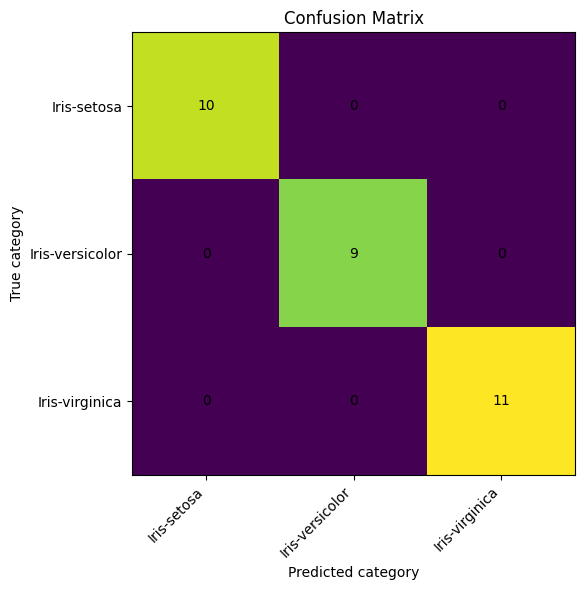

In [11]:
import matplotlib.pyplot as plt

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm, interpolation='nearest')
ax.set_xticks(np.arange(len(category_names)))
ax.set_yticks(np.arange(len(category_names)))
ax.set_xticklabels(category_names, rotation=45, ha='right')
ax.set_yticklabels(category_names)
ax.set_xlabel('Predicted category')
ax.set_ylabel('True category')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

## With Cross Validation

In [40]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Settings
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
confusion_matrices = []  # list to store each fold's confusion matrix
classification_reports = []  # list to store each fold's classification report 

# Manual cross-validation loop
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    model_cv = KNearestNeighbors(k=5)  # Same k=5
    points_cv = {}
    for feature, label in zip(X_train_cv.values, y_train_cv):
        if label not in points_cv:
            points_cv[label] = []
        points_cv[label].append(feature)
    
    model_cv.fit(points_cv)
    
    y_pred_cv = []
    for x in X_test_cv.values:
        y_pred_cv.append(model_cv.predict(x))
    
    # Accuracy
    acc = accuracy_score(y_test_cv, y_pred_cv)
    accuracies.append(acc)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_cv, y_pred_cv, labels=dataset_df['Species'].unique())
    confusion_matrices.append(cm)
    
    # Classification Report (parsed into a dictionary)
    report = classification_report(
        y_test_cv, y_pred_cv, 
        target_names=['setosa','versicolor','virginica'], 
        output_dict=True  # IMPORTANT: instead of text, return as dictionary
    )
    classification_reports.append(report)
    
    # (Optional) Minimal print so you know it's working
    print(f"Fold {fold} Accuracy: {acc:.4f}")

# Overall
formatted_accuracies = [f"{acc:.2f}" for acc in accuracies]
print("\nCross-Validation Accuracies:", formatted_accuracies )
print(f"Average Cross-Validation Accuracy: {np.mean(accuracies):.4f}")


Fold 1 Accuracy: 1.0000
Fold 2 Accuracy: 1.0000
Fold 3 Accuracy: 0.9667
Fold 4 Accuracy: 0.9333
Fold 5 Accuracy: 0.9667

Cross-Validation Accuracies: ['1.00', '1.00', '0.97', '0.93', '0.97']
Average Cross-Validation Accuracy: 0.9733


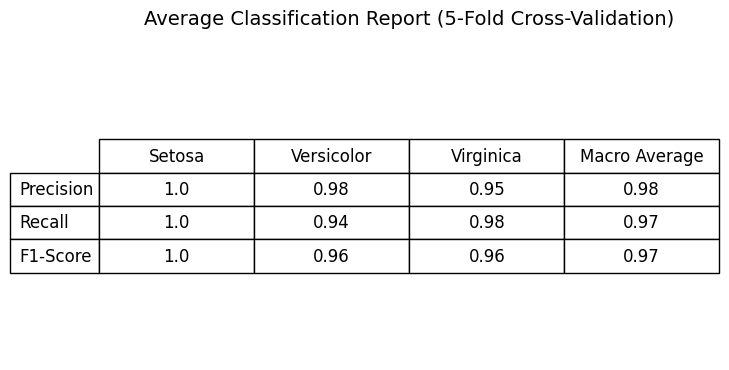

In [43]:
import pandas as pd

# Create a list to accumulate reports
report_list = []

# Only interested in setosa, versicolor, virginica, macro avg
for report in classification_reports:
    selected = {
        'setosa_precision': report['setosa']['precision'],
        'setosa_recall': report['setosa']['recall'],
        'setosa_f1': report['setosa']['f1-score'],
        'versicolor_precision': report['versicolor']['precision'],
        'versicolor_recall': report['versicolor']['recall'],
        'versicolor_f1': report['versicolor']['f1-score'],
        'virginica_precision': report['virginica']['precision'],
        'virginica_recall': report['virginica']['recall'],
        'virginica_f1': report['virginica']['f1-score'],
        'macro_precision': report['macro avg']['precision'],
        'macro_recall': report['macro avg']['recall'],
        'macro_f1': report['macro avg']['f1-score'],
    }
    report_list.append(selected)

# Convert to DataFrame
report_df = pd.DataFrame(report_list)

# Average across folds
avg_report = report_df.mean()

# Convert it into a table format
# Split into classes and metrics
data = {
    "Setosa": [avg_report['setosa_precision'], avg_report['setosa_recall'], avg_report['setosa_f1']],
    "Versicolor": [avg_report['versicolor_precision'], avg_report['versicolor_recall'], avg_report['versicolor_f1']],
    "Virginica": [avg_report['virginica_precision'], avg_report['virginica_recall'], avg_report['virginica_f1']],
    "Macro Average": [avg_report['macro_precision'], avg_report['macro_recall'], avg_report['macro_f1']]
}

# Create DataFrame
avg_report_df = pd.DataFrame(data, index=['Precision', 'Recall', 'F1-Score'])

# Plot as a table
fig, ax = plt.subplots(figsize=(8, 4)) 
ax.axis('off')  
table = ax.table(
    cellText=avg_report_df.round(2).values,
    colLabels=avg_report_df.columns,
    rowLabels=avg_report_df.index,
    loc='center',
    cellLoc='center'
)
table.scale(1, 2) 
table.auto_set_font_size(False)
table.set_fontsize(12)
plt.title("Average Classification Report (5-Fold Cross-Validation)", fontsize=14, pad=20)
plt.show()



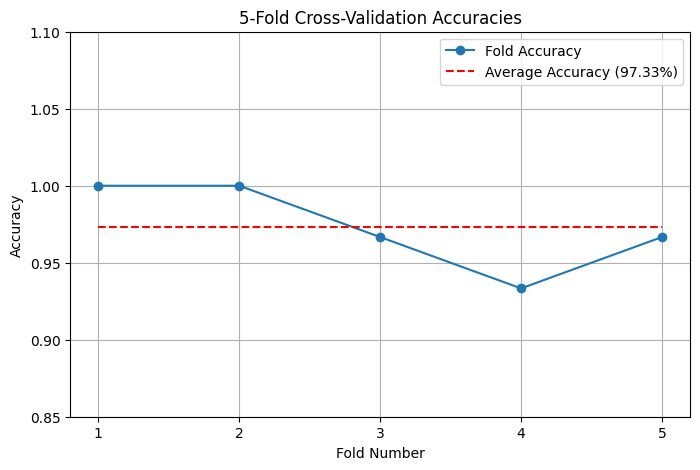

In [38]:
import matplotlib.pyplot as plt
import numpy as np

folds = np.arange(1, len(accuracies)+1)

# Plot
plt.figure(figsize=(8,5))
plt.plot(folds, accuracies, marker='o', linestyle='-', label='Fold Accuracy')
plt.hlines(np.mean(accuracies), xmin=1, xmax=5, colors='red', linestyles='dashed', label=f'Average Accuracy ({np.mean(accuracies)*100:.2f}%)')

plt.xticks(folds)
plt.ylim(0.85, 1.1)
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation Accuracies')
plt.legend()
plt.grid(True)
plt.show()


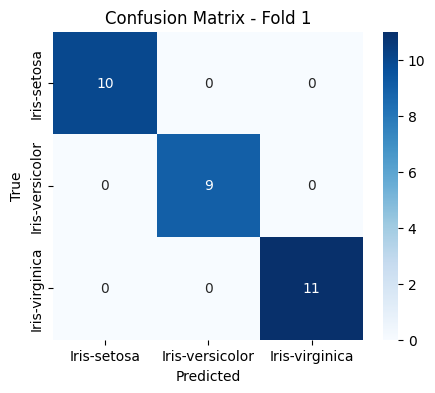

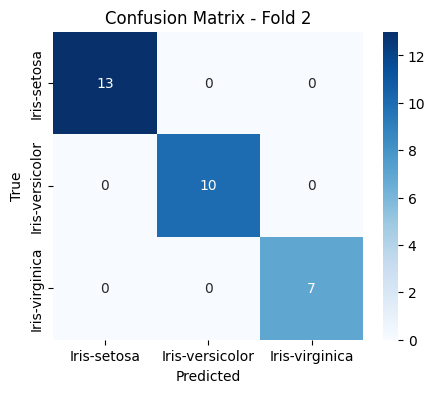

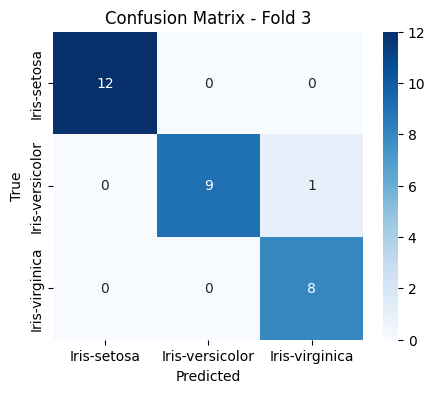

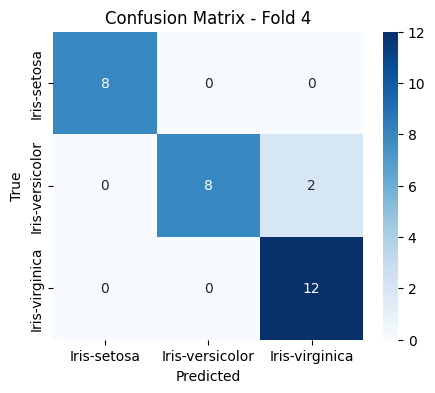

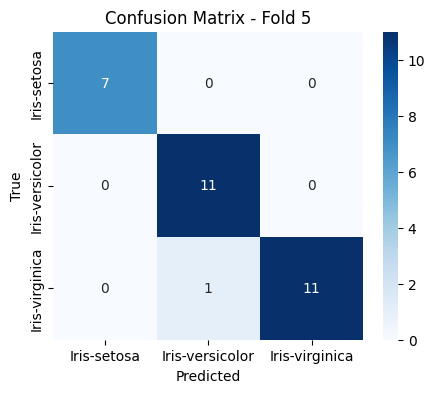

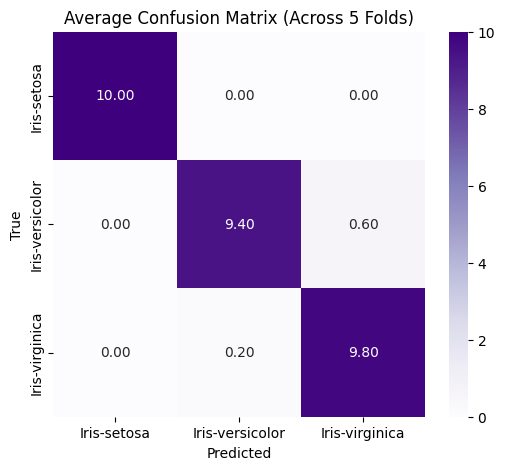

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Labels
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Plot each fold's confusion matrix
for i, cm in enumerate(confusion_matrices, 1):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix - Fold {i}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Average Confusion Matrix
avg_cm = np.mean(confusion_matrices, axis=0)

# Plot the average confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(avg_cm, annot=True, fmt='.2f', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.title("Average Confusion Matrix (Across 5 Folds)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
